In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/rating_electronics.csv')

In [3]:
df.head()

,user_id,product_id,rating,dtype
0,A2CX7LUOHB2NDG,321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,511189877,5.0,1.397434e+09


In [4]:
df.shape

(106068, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106068 entries, 0 to 106067
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     106068 non-null  object 
 1   product_id  106068 non-null  object 
 2   rating      106067 non-null  float64
 3   dtype       106067 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.2+ MB


In [6]:
df.isnull().sum()

user_id       0
product_id    0
rating        1
dtype         1
dtype: int64

In [7]:
df.isna().sum()

user_id       0
product_id    0
rating        1
dtype         1
dtype: int64

In [8]:
df.describe()

,rating,dtype
count,106067.000000,1.060670e+05
mean,4.037948,1.200195e+09
std,1.351309,1.622075e+08
min,1.000000,9.127296e+08
25%,4.000000,1.016237e+09
50%,5.000000,1.236211e+09
75%,5.000000,1.360022e+09
max,5.000000,1.405987e+09


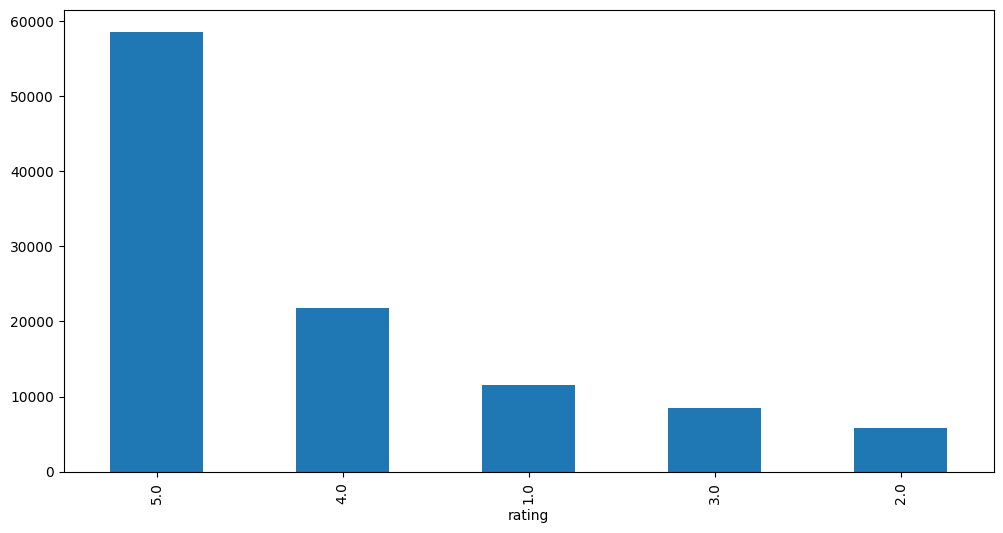

In [9]:
plt.figure(figsize=(12,6))
df['rating'].value_counts().plot(kind='bar')
plt.show()

Users with most no of ratings

In [10]:
most_rated=df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
A231WM2Z2JL0U3    112
A2BGZ52M908MJY     51
AY8Q1X7G96HV5      37
A1MJMYLRTZ76ZX     35
A7Y6AVS576M03      31
A1NVD0TKNS1GT5     30
A1RPTVW5VEOSI      30
A3MEIR72XKQY88     27
ALUNVOQRXOZIA      26
AKT8TGIT6VVZ5      26
dtype: int64

In [11]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())



The number of observations in the final data = 163
Number of unique USERS in the final data =  2


checking the density of the rating matrix

In [12]:
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (2, 157)


In [13]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()


given_num_of_ratings =  163
possible_num_of_ratings =  314
density: 51.91%


product_id,B00000J1US,B00000J570,B00000JFJA,B00000JSGF,B00000K4KH,B00001OPK8,B00001XE0L,B00001YVG4,B000021YUO,B000023VUL,...,B00005KAMS,B00005KB24,B00005LAEP,B00005LB8P,B00005LDQH,B00005MA7J,B00005MA9X,B00005MAAR,B00005MEMN,B00005MEN6
user_id,,,,,,,,,,,,,,,,,,,,,
A231WM2Z2JL0U3,5.0,4.0,3.0,4.0,5.0,4.0,0.0,5.0,5.0,5.0,...,3.0,5.0,0.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
A2BGZ52M908MJY,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rank based recommendation system

In [14]:
# Convert the 'rating' column to numeric, handling non-numeric values
df_final['rating'] = pd.to_numeric(df_final['rating'], errors='coerce')

# Calculate the mean of ratings, excluding NaN values
average_rating = df_final.groupby('product_id')['rating'].mean(numeric_only=True)

# Calculate the count of ratings for each product
count_rating = df_final.groupby('product_id')['rating'].count()
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

# Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

,avg_rating,rating_count
product_id,,
B00000J1US,5.0,1
B000051123,5.0,2
B000050AQ7,5.0,1
B00004ZCNS,5.0,1
B00004ZCEX,5.0,1


In [15]:
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

Recommending top 5 products with 100 minimumbinteractions based on popularity

In [16]:
list(top_n_products(final_rating, 2, 100)) # Use 'final_rating' instead of 'final_ratings'

[]

In [17]:
final_ratings_matrix.head()

product_id,B00000J1US,B00000J570,B00000JFJA,B00000JSGF,B00000K4KH,B00001OPK8,B00001XE0L,B00001YVG4,B000021YUO,B000023VUL,...,B00005KAMS,B00005KB24,B00005LAEP,B00005LB8P,B00005LDQH,B00005MA7J,B00005MA9X,B00005MAAR,B00005MEMN,B00005MEN6
user_id,,,,,,,,,,,,,,,,,,,,,
A231WM2Z2JL0U3,5.0,4.0,3.0,4.0,5.0,4.0,0.0,5.0,5.0,5.0,...,3.0,5.0,0.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
A2BGZ52M908MJY,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function to find the similar users and their similarity scores

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [19]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

CSR matrix

In [20]:
from scipy.sparse import csr_matrix
import numpy as np
from scipy.sparse.linalg import svds

# Assuming 'final_ratings_matrix' is defined somewhere in your code
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

# Calculate the minimum dimension of your matrix
min_dim = min(final_ratings_sparse.shape)

# Choose a k that satisfies the condition 0 < k < min_dim
k = min(50, min_dim - 1)  # Example: choose k = 50 or min_dim - 1, whichever is smaller

U, s, Vt = svds(final_ratings_sparse, k=k)

# Construct diagonal array in SVD
sigma = np.diag(s)

In [21]:
U.shape


(2, 1)

In [22]:
sigma.shape

(1, 1)

In [23]:
Vt.shape

(1, 157)

In [24]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

Evaluating the model

In [25]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()


product_id,B00000J1US,B00000J570,B00000JFJA,B00000JSGF,B00000K4KH,B00001OPK8,B00001XE0L,B00001YVG4,B000021YUO,B000023VUL,...,B00005KAMS,B00005KB24,B00005LAEP,B00005LB8P,B00005LDQH,B00005MA7J,B00005MA9X,B00005MAAR,B00005MEMN,B00005MEN6
user_index,,,,,,,,,,,,,,,,,,,,,
0,5.0,4.0,3.0,4.0,5.0,4.0,0.0,5.0,5.0,5.0,...,3.0,5.0,0.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

product_id
B00000J1US    2.5
B00000J570    2.0
B00000JFJA    1.5
B00000JSGF    2.0
B00000K4KH    2.5
dtype: float64

In [27]:
preds_df.head()

product_id,B00000J1US,B00000J570,B00000JFJA,B00000JSGF,B00000K4KH,B00001OPK8,B00001XE0L,B00001YVG4,B000021YUO,B000023VUL,...,B00005KAMS,B00005KB24,B00005LAEP,B00005LB8P,B00005LDQH,B00005MA7J,B00005MA9X,B00005MAAR,B00005MEMN,B00005MEN6
0,4.964610,3.971688,2.978766,3.971688,4.964610,3.971688,0.419165,4.964610,4.964610,4.964610,...,2.978766,4.964610,0.419165,4.964610,3.971688,3.971688,4.964610,4.964610,3.971688,3.971688
1,0.419165,0.335332,0.251499,0.335332,0.419165,0.335332,0.035390,0.419165,0.419165,0.419165,...,0.251499,0.419165,0.035390,0.419165,0.335332,0.335332,0.419165,0.419165,0.335332,0.335332


In [28]:
avg_preds=preds_df.mean()
avg_preds.head()


product_id
B00000J1US    2.691887
B00000J570    2.153510
B00000JFJA    1.615132
B00000JSGF    2.153510
B00000K4KH    2.691887
dtype: float64

In [29]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
product_id,,
B00000J1US,2.5,2.691887
B00000J570,2.0,2.153510
B00000JFJA,1.5,1.615132
B00000JSGF,2.0,2.153510
B00000K4KH,2.5,2.691887


In [30]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 1.0983531377618205 

